## Can you answer which model is better ?

![](PythonDataScienceHandbook-master/notebooks/figures/05.03-bias-variance.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Model validation the wrong way

In [2]:
X=pd.read_csv("logisticData/ex4x.dat",sep="   ",header=None) #sep is 3 spaces
Y=pd.read_csv("logisticData/ex4y.dat",header=None)

/home/ganesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
Y_actual=np.array(Y.T)[0]
df = {"test1":np.array(X[0]),"test2":np.array(X[1]),"Is admission":Y_actual}
df=pd.DataFrame(df)
df

,test1,test2,Is admission
0,55.5,69.5,1.0
1,41.0,81.5,1.0
2,53.5,86.0,1.0
3,46.0,84.0,1.0
4,41.0,73.5,1.0
5,51.5,69.0,1.0
6,51.0,62.5,1.0
7,42.0,75.0,1.0
8,53.5,83.0,1.0
9,57.5,71.0,1.0


In [4]:
from sklearn import linear_model

In [5]:
model=linear_model.LogisticRegression()
model.fit(X,Y)

/home/ganesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
Y_predicted=model.predict(X)
X.shape[0]

80

In [7]:
Y_actual=np.array(Y.T)[0]
total_num_examples=X.shape[0]

In [26]:
accuracy=np.sum(Y_predicted==Y_actual)/total_num_examples

In [12]:
accuracy

0.7125

## Sklearn also finds accuracy

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_actual, Y_predicted)

0.7125

## Test Train Split (Model validation the right way: Holdout sets)

In [20]:
from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, Y, random_state=0,
                                  train_size=0.7)
# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

/home/ganesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5833333333333334

* ** half the dataset does not contribute to the training of the model!**
* ** To Overcome this issue we can use Cross validation **


![](PythonDataScienceHandbook-master/notebooks/figures/05.03-2-fold-CV.png)

In [21]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

/home/ganesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.625, 0.5833333333333334)

### 5 Fold CV

![](PythonDataScienceHandbook-master/notebooks/figures/05.03-5-fold-CV.png)

In [22]:
from sklearn.cross_validation import cross_val_score

In [23]:
y_actual=np.array(Y.T)[0]

### How to choose model

In [24]:
cross_val_score(model,X.values,y_actual,cv=5)

array([0.6875, 0.875 , 0.4375, 0.5625, 0.8125])

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)

In [26]:
cross_val_score(model2,X.values,y_actual,cv=5)

array([1.    , 0.875 , 0.6875, 0.5625, 0.75  ])

In [27]:
np.sqrt(80)

8.94427190999916

### How to tune model

In [28]:
N_neighbors = list(range(1,10))
cvAcc=[]
for n in N_neighbors:
    model=KNeighborsClassifier(n_neighbors=n)
    cv=cross_val_score(model,X.values,y_actual,cv=5)
    cvAcc.append(cv.mean())

In [29]:
cvAcc

[0.75, 0.75, 0.7625, 0.7625, 0.775, 0.7875, 0.8375, 0.7875, 0.7875]

Text(0,0.5,'Accuracy')

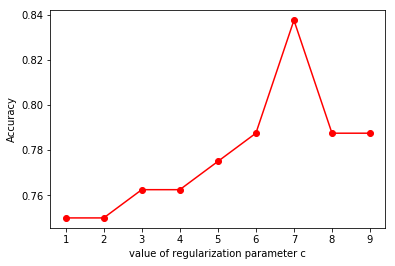

In [30]:
plt.plot(N_neighbors,cvAcc,'ro-')
plt.xlabel("value of regularization parameter c")
plt.ylabel("Accuracy")